In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv("C:\\Users\\SUBINOY\\Documents\\dataset_netflix.csv")

In [3]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
#Removing missing values!

In [6]:
df['director']= df['director'].replace('Not Given', np.NaN)
df['country']= df['country'].replace('Not Given', np.NaN)

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2588
country          287
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
dtype: int64

In [8]:
df1= df.dropna(axis=0, how='any')

In [9]:
df1.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [10]:
len(df1)

5915

After removing missing values 5915 rows are present.

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='release_year'>

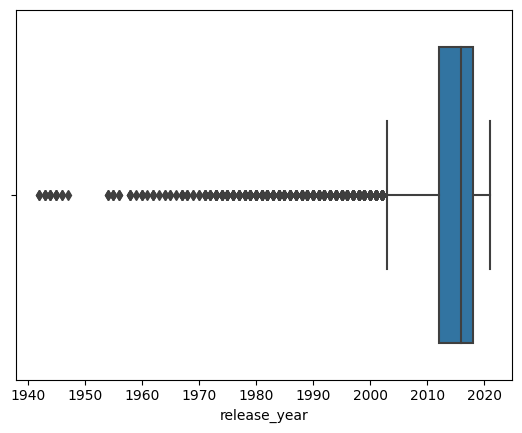

In [12]:
sns.boxplot(x= df1['release_year']) 

In [13]:
df1.describe()

,release_year
count,5915.000000
mean,2013.014708
std,9.693770
min,1942.000000
25%,2012.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


In [14]:
upper_limit= 2018+ 1.5*6
lower_limit= 2012- 1.5*6

In [15]:
new_data1= df1[(df1['release_year']>lower_limit) & (df1['release_year']< upper_limit)]

<Axes: xlabel='release_year'>

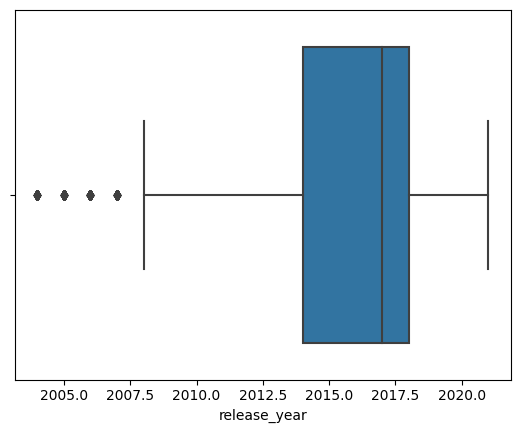

In [16]:
sns.boxplot(x= new_data1['release_year'])

In [17]:
lower_limit= 2018-1.5*6

In [18]:
new_data2= df1[(df1['release_year']<upper_limit) & (df1['release_year']>lower_limit)]

<Axes: xlabel='release_year'>

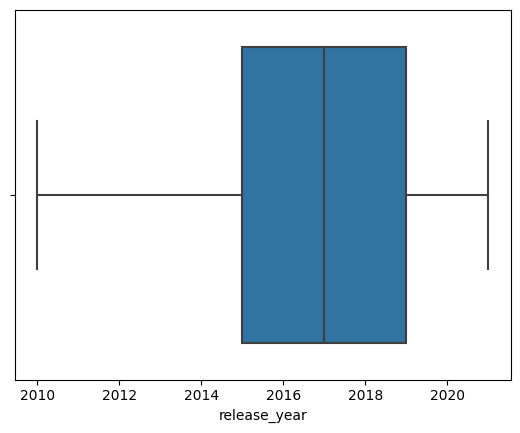

In [19]:
sns.boxplot(x= new_data2['release_year'])

In [20]:
len(new_data2)

4777

After removing outliers 4777 rows are present.

In [21]:
df2= new_data2.copy()

In [22]:
df2.type.value_counts()

type
Movie      4569
TV Show     208
Name: count, dtype: int64

In [23]:
df2['country'].value_counts()

country
United States     1830
India              726
United Kingdom     339
Canada             179
France             143
                  ... 
Zimbabwe             1
Mozambique           1
Namibia              1
Cameroon             1
Croatia              1
Name: count, Length: 76, dtype: int64

Text(0.5, 1.0, 'Count VS Show types')

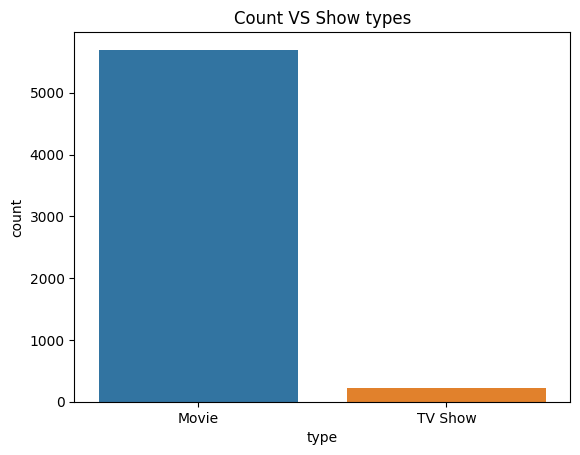

In [24]:
sns.countplot(x=df1['type'])
plt.title('Count VS Show types')

Text(0.5, 1.0, 'Country wise content on Netflix')

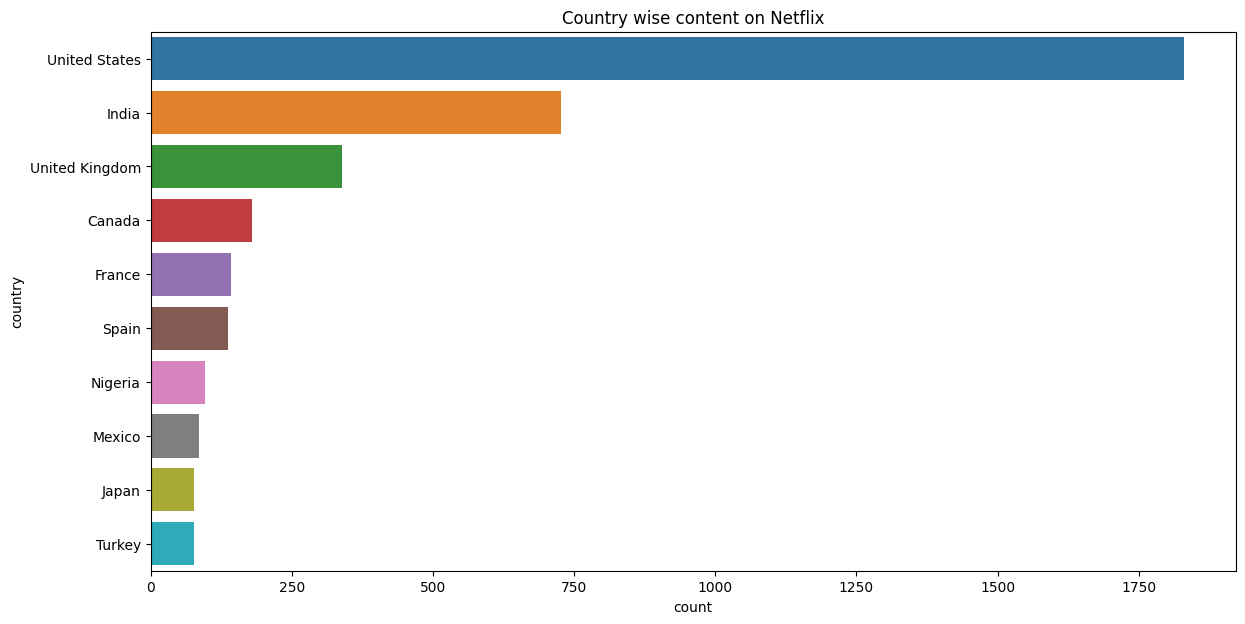

In [25]:
plt.figure(figsize=(14,7))
sns.countplot(y= df2['country'], order= df2['country'].value_counts().index[0:10])
plt.title('Country wise content on Netflix')

In [26]:
movie_countries= df2[df2['type']=='Movie']
tv_show_countries= df2[df2['type']=='TV Show']

Text(0.5, 1.0, 'Top 10 Countries producing Movies in Netflix')

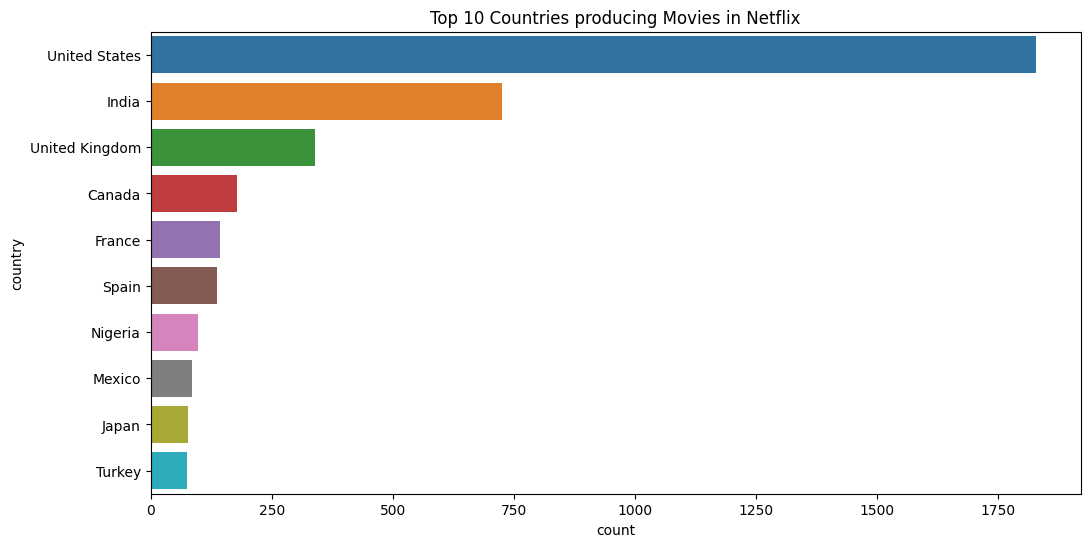

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(y=df2['country'], order= df2['country'].value_counts().index[0:10])
plt.title('Top 10 Countries producing Movies in Netflix')

Text(0.5, 1.0, 'Top 10 countries producing TV Shows in Netflix')

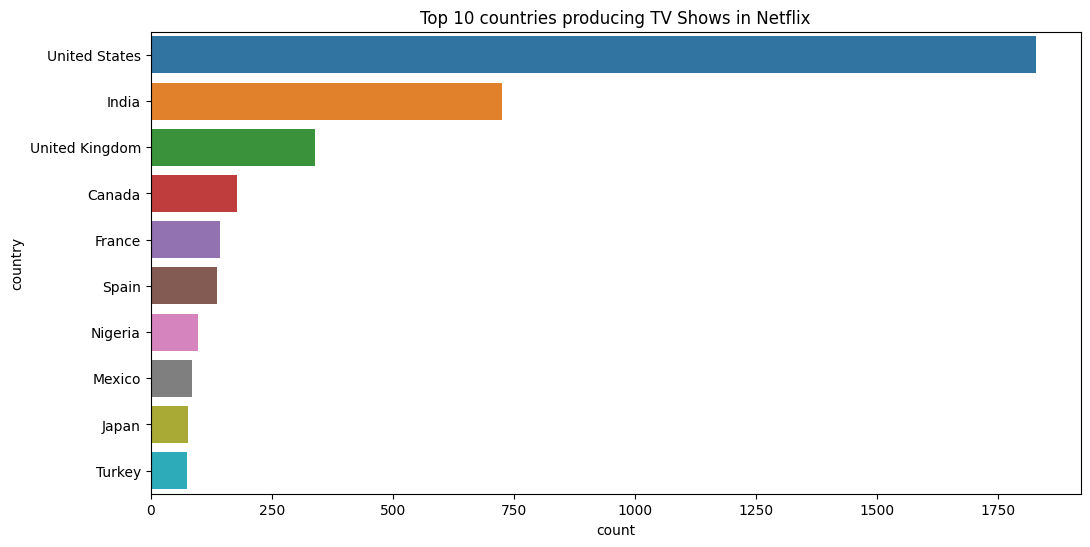

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(y= df2['country'], order= df2['country'].value_counts().index[0:10])
plt.title('Top 10 countries producing TV Shows in Netflix')

Text(0.5, 1.0, "Top 20 Director's Shows on Netflix")

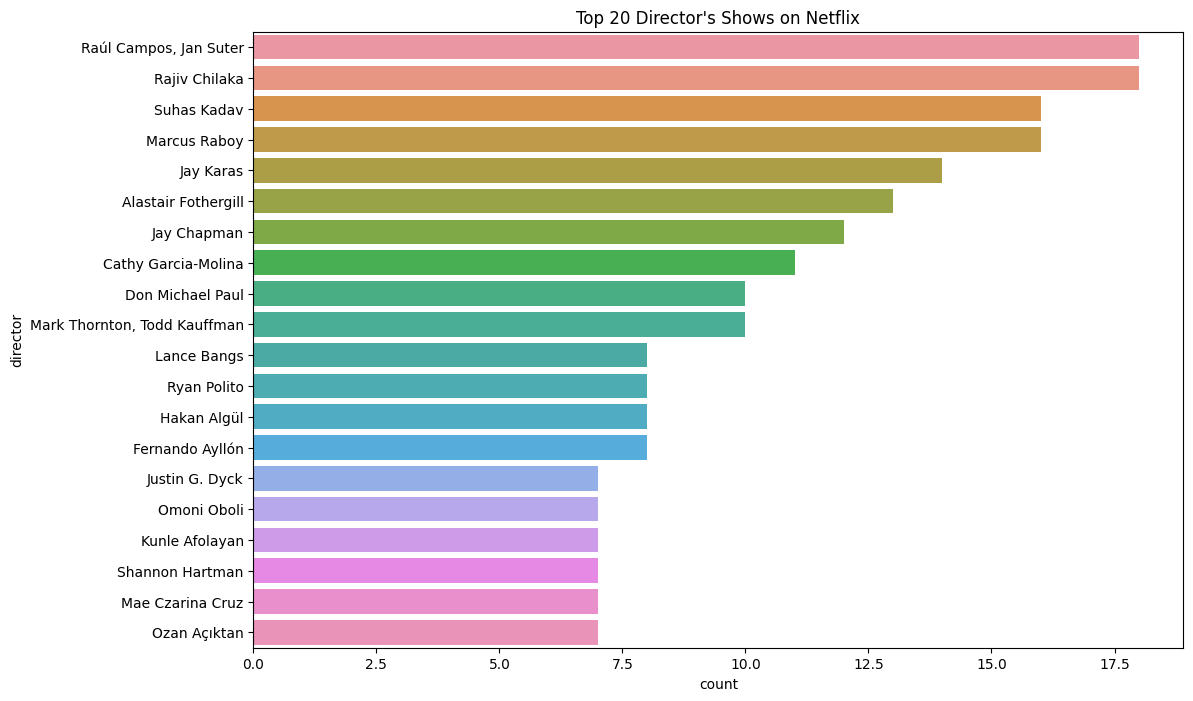

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(y= df2['director'], order=df2['director'].value_counts().index[0:20])
plt.title("Top 20 Director's Shows on Netflix")

Text(0.5, 1.0, 'Rating of Shows on Netflix VS Count')

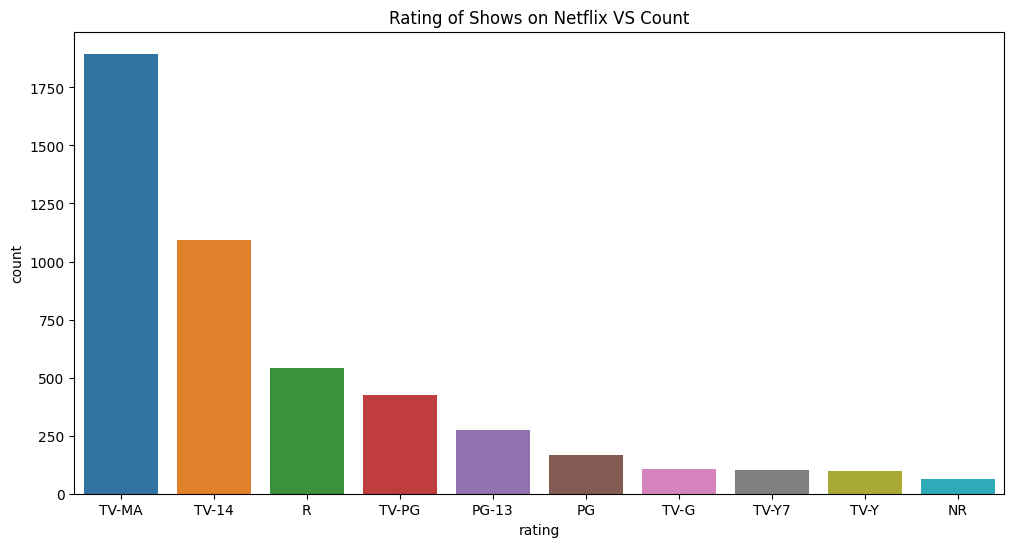

In [30]:
plt.figure(figsize= (12,6))
sns.countplot(x=df2['rating'], order= df2['rating'].value_counts().index[0:10])
plt.title("Rating of Shows on Netflix VS Count")

In [31]:
df2['release_year'].value_counts()

release_year
2017    744
2018    730
2016    645
2019    598
2020    503
2015    386
2014    262
2013    223
2021    219
2012    175
2010    148
2011    144
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 20 Genres on Netflix')

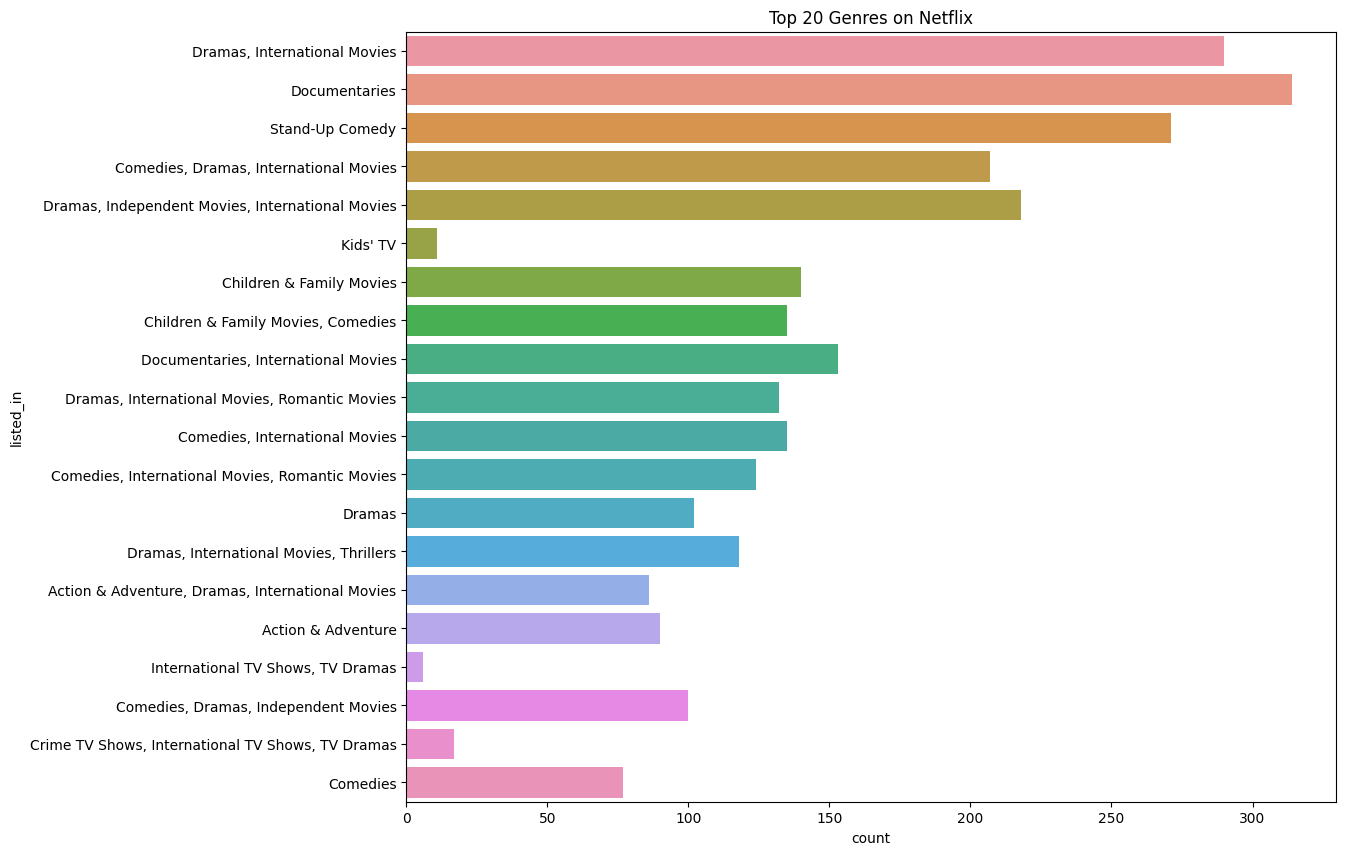

In [32]:
plt.figure(figsize=(12,10))
sns.countplot(y=df2['listed_in'], order=df['listed_in'].value_counts().index[0:20])
plt.title("Top 20 Genres on Netflix")

CONCLUSION:

More Netflix Movies has been released than TV Shows.

Most number of Movies and TV shows has been produced by United States, followed by India.

Netflix released the most content in 2017.

Documentaries are the most popular Genres on Netflix.